## We work with original 30 features and 1 label named “Diagnosis”
## Firstly, we import all neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [2]:
df = pd.read_csv("BreastCancerData.csv")

In [3]:
df = df.drop(columns =["id"])

In [4]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
df1 = df.replace(to_replace =["M","B"],value=[1,0])

In [6]:
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
x = df1.iloc[:,1:]
x.shape

(569, 30)

In [8]:
y=df1["diagnosis"]

In [9]:
y.shape

(569,)

## We split 90% for training, 10% for testing

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (512, 30) (512,)
Test set: (57, 30) (57,)


## We fit the scaler on your training data only, then standardise both training and test sets with that scaler

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
x_train.shape

(512, 30)

In [13]:
x_test.shape

(57, 30)

## One-Hot Encoding: Converting the Labels From Integers to Categorical Data

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
y_train.shape

(512, 2)

In [16]:
y_test.shape

(57, 2)

In [17]:
# Create a neural network
model = Sequential()

## Add layers to the neural network

In [18]:
model.add(Dense(100,input_shape =(30,),activation="relu"))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(2,activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3100      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 8,252
Trainable params: 8,252
Non-trainable params: 0
_________________________________________________________________


# Visualizing the model's structure

In [20]:
from tensorflow.keras.utils import plot_model

In [21]:
from IPython.display import Image

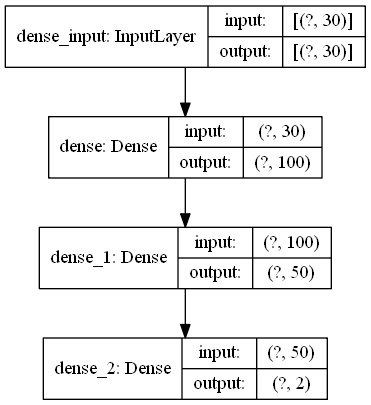

In [22]:
plot_model(model, to_file='neuralNetwork.png', show_shapes=True, 
           show_layer_names=True)

## Compiling the model

In [23]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

## training with 90% for training and 10% for validation

In [24]:
model.fit(x_train, y_train, epochs=50, batch_size=100,validation_split=0.1) 

Train on 460 samples, validate on 52 samples
Epoch 1/50
460/460 [==============================] - 0s 865us/sample - loss: 0.6095 - accuracy: 0.6565 - val_loss: 0.5084 - val_accuracy: 0.8269
Epoch 2/50
460/460 [==============================] - 0s 28us/sample - loss: 0.4572 - accuracy: 0.8587 - val_loss: 0.3948 - val_accuracy: 0.8846
Epoch 3/50
460/460 [==============================] - 0s 35us/sample - loss: 0.3495 - accuracy: 0.9261 - val_loss: 0.3133 - val_accuracy: 0.8846
Epoch 4/50
460/460 [==============================] - 0s 30us/sample - loss: 0.2736 - accuracy: 0.9391 - val_loss: 0.2555 - val_accuracy: 0.9038
Epoch 5/50
460/460 [==============================] - 0s 28us/sample - loss: 0.2189 - accuracy: 0.9478 - val_loss: 0.2160 - val_accuracy: 0.9038
Epoch 6/50
460/460 [==============================] - 0s 30us/sample - loss: 0.1805 - accuracy: 0.9522 - val_loss: 0.1885 - val_accuracy: 0.9038
Epoch 7/50
460/460 [==============================] - ETA: 0s - loss: 0.1866 - accur

## Calculate Loss and Accuracy of the neural model

In [25]:
loss, accuracy = model.evaluate(x_test, y_test, batch_size=100)
print("Loss = " ,loss, "Accuracy = ",accuracy)

57/57 [==============================] - 0s 52us/sample - loss: 0.0894 - accuracy: 0.9825
Loss =  0.0894215926527977 Accuracy =  0.98245615


## Perform Prediction

In [26]:
predictions = model.predict(x_test)
for i in np.arange(len(predictions)):
    print(print("Actual: " , y_test[i],", Predicted:" , predictions[i]))
   

Actual:  [1. 0.] , Predicted: [0.95990884 0.0400911 ]
None
Actual:  [0. 1.] , Predicted: [6.4606476e-04 9.9935395e-01]
None
Actual:  [0. 1.] , Predicted: [0.00172552 0.99827445]
None
Actual:  [1. 0.] , Predicted: [9.993672e-01 6.328802e-04]
None
Actual:  [1. 0.] , Predicted: [9.9962294e-01 3.7699513e-04]
None
Actual:  [0. 1.] , Predicted: [2.9765264e-04 9.9970227e-01]
None
Actual:  [0. 1.] , Predicted: [3.2104301e-04 9.9967897e-01]
None
Actual:  [0. 1.] , Predicted: [0.03899173 0.9610082 ]
None
Actual:  [1. 0.] , Predicted: [0.6690027  0.33099735]
None
Actual:  [1. 0.] , Predicted: [0.99875414 0.00124588]
None
Actual:  [1. 0.] , Predicted: [0.89879715 0.10120286]
None
Actual:  [0. 1.] , Predicted: [0.01789909 0.9821009 ]
None
Actual:  [1. 0.] , Predicted: [0.9880945  0.01190552]
None
Actual:  [0. 1.] , Predicted: [0.03237764 0.9676223 ]
None
Actual:  [1. 0.] , Predicted: [9.991499e-01 8.500795e-04]
None
Actual:  [0. 1.] , Predicted: [0.00484487 0.9951551 ]
None
Actual:  [1. 0.] , Predi

# Try with 16 features

In [27]:
x1 = df1[['texture_mean', 'area_mean', 'smoothness_mean','concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']]
x1.shape

(569, 16)

In [28]:
y1=df1["diagnosis"]

In [29]:
y1.shape

(569,)

### We split 90% for training, 10% for testing

In [30]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.1,random_state=42)
print ('Train set:', x1_train.shape,  y1_train.shape)
print ('Test set:', x1_test.shape,  y1_test.shape)

Train set: (512, 16) (512,)
Test set: (57, 16) (57,)


### We fit the scaler on your training data only, then standardise both training and test sets with that scaler

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

In [32]:
x1_train.shape

(512, 16)

In [33]:
x1_test.shape

(57, 16)

### One-Hot Encoding: Converting the Labels From Integers to Categorical Data

In [34]:
y1_train = to_categorical(y1_train)
y1_test = to_categorical(y1_test)

In [35]:
y1_train.shape

(512, 2)

In [36]:
y1_test.shape

(57, 2)

### Create a neural network model

In [37]:
model1 = Sequential()

### Add layers to the neural network

In [38]:
model1.add(Dense(100,input_shape =(16,),activation="relu"))
model1.add(Dense(50,activation="sigmoid"))
model1.add(Dense(2,activation="softmax"))

In [39]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1700      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 102       
Total params: 6,852
Trainable params: 6,852
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [40]:
model1.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

### Training with 90% for training and 10% for validation

In [41]:
model1.fit(x1_train, y1_train, epochs=50, batch_size=100,validation_split=0.1) 

Train on 460 samples, validate on 52 samples
Epoch 1/50
460/460 [==============================] - 0s 837us/sample - loss: 1.0143 - accuracy: 0.3870 - val_loss: 0.8991 - val_accuracy: 0.3269
Epoch 2/50
460/460 [==============================] - 0s 26us/sample - loss: 0.8123 - accuracy: 0.3891 - val_loss: 0.6984 - val_accuracy: 0.4615
Epoch 3/50
460/460 [==============================] - 0s 28us/sample - loss: 0.6563 - accuracy: 0.5326 - val_loss: 0.5576 - val_accuracy: 0.8077
Epoch 4/50
460/460 [==============================] - 0s 28us/sample - loss: 0.5451 - accuracy: 0.8174 - val_loss: 0.4673 - val_accuracy: 0.8269
Epoch 5/50
460/460 [==============================] - 0s 28us/sample - loss: 0.4697 - accuracy: 0.8957 - val_loss: 0.4096 - val_accuracy: 0.9231
Epoch 6/50
460/460 [==============================] - 0s 30us/sample - loss: 0.4133 - accuracy: 0.9109 - val_loss: 0.3704 - val_accuracy: 0.9038
Epoch 7/50
460/460 [==============================] - 0s 28us/sample - loss: 0.3704 

### Calculate Loss and Accuracy of the neural model

In [42]:
loss, accuracy = model1.evaluate(x1_test, y1_test, batch_size=100)
print("Loss = " ,loss, "Accuracy = ",accuracy)

57/57 [==============================] - 0s 52us/sample - loss: 0.1148 - accuracy: 0.9825
Loss =  0.1147887334227562 Accuracy =  0.98245615


### Perform Prediction

In [43]:
predictions = model1.predict(x1_test)
for i in np.arange(len(predictions)):
    print(print("Actual: " , y1_test[i],", Predicted:" , predictions[i]))

Actual:  [1. 0.] , Predicted: [0.90762866 0.09237137]
None
Actual:  [0. 1.] , Predicted: [0.00486355 0.99513644]
None
Actual:  [0. 1.] , Predicted: [0.00633942 0.9936606 ]
None
Actual:  [1. 0.] , Predicted: [0.9931323  0.00686772]
None
Actual:  [1. 0.] , Predicted: [0.9969212 0.0030788]
None
Actual:  [0. 1.] , Predicted: [0.00126945 0.9987306 ]
None
Actual:  [0. 1.] , Predicted: [0.00147325 0.9985267 ]
None
Actual:  [0. 1.] , Predicted: [0.39952004 0.60047996]
None
Actual:  [1. 0.] , Predicted: [0.63182354 0.36817646]
None
Actual:  [1. 0.] , Predicted: [0.9931678  0.00683221]
None
Actual:  [1. 0.] , Predicted: [0.7785531  0.22144683]
None
Actual:  [0. 1.] , Predicted: [0.08812931 0.9118707 ]
None
Actual:  [1. 0.] , Predicted: [0.9597538  0.04024621]
None
Actual:  [0. 1.] , Predicted: [0.02571172 0.9742882 ]
None
Actual:  [1. 0.] , Predicted: [0.9950867  0.00491326]
None
Actual:  [0. 1.] , Predicted: [0.03978762 0.96021235]
None
Actual:  [1. 0.] , Predicted: [0.9937896  0.00621034]
None

## Conclusion
#### The Neural NetWork Model has good prediction with accruracy score around 98% but takes more time than other model to train the data.  Furthermore, after applying feature selection with 16 features, the model still yields a good prediction with the same accuracy score = 0.9825 compared with 30 features, yet the loss is slightly higher than the loss with original 30 features (0.1148 and 0.0894)